In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import time
%matplotlib inline
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import pandas

Using TensorFlow backend.


In [2]:
import keras
import tensorflow

In [3]:
t=time.time()
train_data = np.array(list(np.loadtxt("train1.csv", delimiter=","))).astype("float32")
train_labels = np.array(list(np.loadtxt("train_label.csv", delimiter=","))).astype("float32")
eval_data = np.array(list(np.loadtxt("eval1.csv", delimiter=","))).astype("float32")
eval_labels = np.array(list(np.loadtxt("eval_label.csv", delimiter=","))).astype("float32")

#eval_data = pandas.read_csv("eval.csv", delimiter=",",header=None,dtype='float32')
#eval_labels = pandas.read_csv("eval_label.csv", delimiter=",",header=None,dtype='float32')
print(time.time()-t)

48.02976989746094


In [4]:
t=time.time()
test_data = np.array(list(np.loadtxt("dis1_0.5M.csv", delimiter=","))).astype("float32")
test_labels = np.array(list(np.loadtxt("dis1_0.5_label.csv", delimiter=","))).astype("float32")
print(time.time()-t)

23.5686776638031


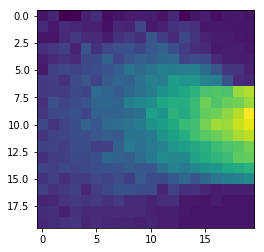

614.593
[1.        0.9875887 0.95      1.       ] [0.996756   0.98738945 0.95       1.        ] [0.9327957 0.9855577 0.95      1.       ]
(64000, 4) (64000, 24, 24, 1)


In [5]:
x_train = train_data.reshape(-1, 24,24,1)
x_val = eval_data.reshape(-1, 24,24,1)
x_test = test_data.reshape(-1, 24,24,1)

y_train=np.abs(np.reshape(train_labels,(-1,4)))
y_val=np.abs(np.reshape(eval_labels,(-1,4)))
y_test=np.abs(np.reshape(test_labels,(-1,4)))

plt.imshow(-np.reshape(test_labels,(20,20,100,4))[:,:,98,0])
plt.show()
y_max=max(np.max(y_train[:,0]),np.max(y_val[:,0]))  #maximum observed chirality
y_train[:,0]=y_train[:,0]/y_max
y_val[:,0]=y_val[:,0]/y_max
y_test[:,0]=y_test[:,0]/y_max
print(y_max)
print(np.amax(y_train,axis=0),np.amax(y_val,axis=0),np.amax(y_test,axis=0))
print(np.shape(y_train),np.shape(x_train))

In [6]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (6, 6), activation='relu', input_shape = (24, 24,1)))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(Dropout(0.5))

model.add(Dense(4, activation='sigmoid'))

In [7]:
model.compile(loss='mean_squared_error', optimizer = Adam(lr=1e-4))#, metrics=["accuracy"]) #binary_crossentropy

In [9]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [10]:
hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=10, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val, y_val), #For speed
                           callbacks=[annealer])

Train on 64000 samples, validate on 16000 samples
Epoch 1/10
 - 5s - loss: 0.0160 - val_loss: 0.0040
Epoch 2/10
 - 3s - loss: 0.0048 - val_loss: 0.0045
Epoch 3/10
 - 3s - loss: 0.0040 - val_loss: 0.0035
Epoch 4/10
 - 3s - loss: 0.0037 - val_loss: 0.0031
Epoch 5/10
 - 3s - loss: 0.0035 - val_loss: 0.0028
Epoch 6/10
 - 3s - loss: 0.0033 - val_loss: 0.0026
Epoch 7/10
 - 3s - loss: 0.0031 - val_loss: 0.0030
Epoch 8/10
 - 3s - loss: 0.0030 - val_loss: 0.0029
Epoch 9/10
 - 3s - loss: 0.0029 - val_loss: 0.0031
Epoch 10/10
 - 3s - loss: 0.0029 - val_loss: 0.0037


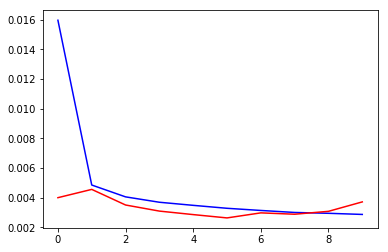

In [11]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

In [12]:
y_hat = model.predict(x_val)

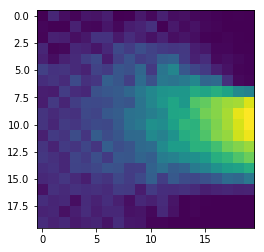

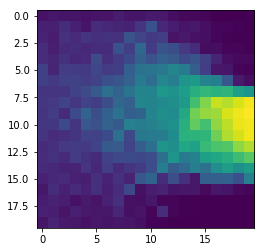

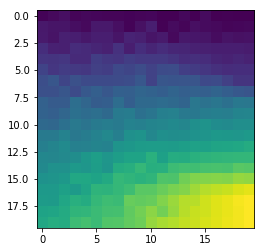

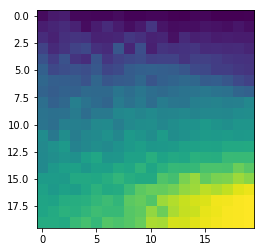

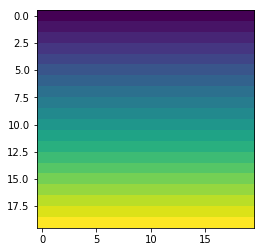

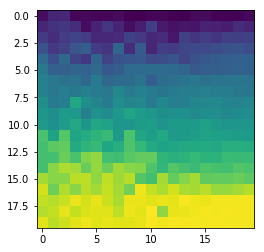

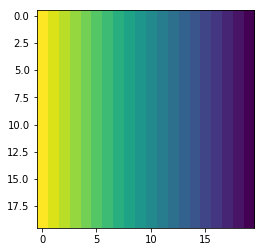

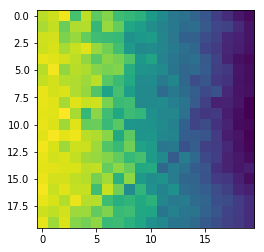

(20, 20, 40, 4)


In [13]:
y_val=np.reshape(y_val,(20,20,40,4))
y_hat=np.reshape(y_hat,(20,20,40,4))

plt.imshow(y_val[:,:,20,0])
plt.show()
plt.imshow(y_hat[:,:,20,0])
plt.show()

plt.imshow(y_val[:,:,20,1])
plt.show()
plt.imshow(y_hat[:,:,20,1])
plt.show()

plt.imshow(y_val[:,:,20,2])
plt.show()
plt.imshow(y_hat[:,:,20,2])
plt.show()

plt.imshow(y_val[:,:,20,3])
plt.show()
plt.imshow(y_hat[:,:,20,3])
plt.show()

print(np.shape(y_hat))

In [14]:
y_hat = model.predict(x_test)

In [15]:
np.savetxt('y_act.csv',np.reshape(y_test,(-1,4)),delimiter=',')
np.savetxt('y_predM.csv',np.reshape(y_hat,(-1,4)),delimiter=',')

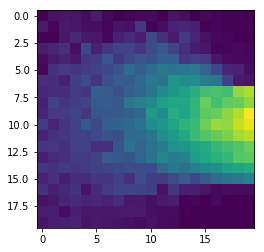

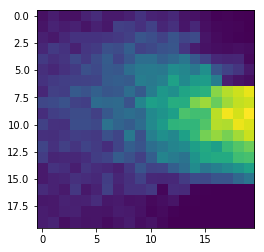

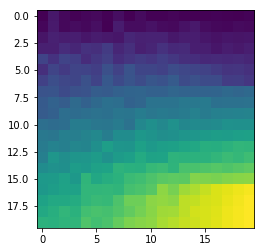

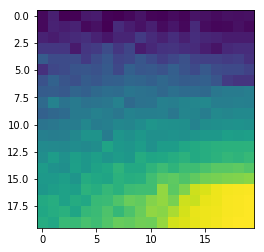

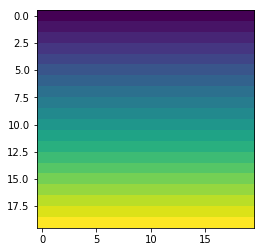

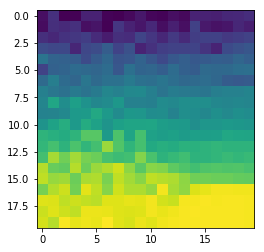

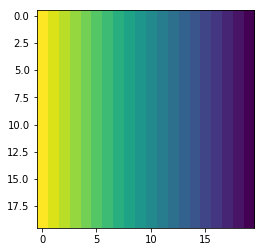

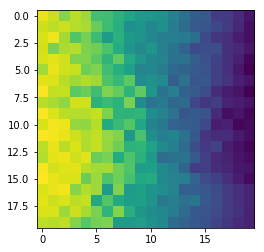

(20, 20, 100, 4)


In [16]:
#y_test=np.abs(np.reshape(test_labels,(-1,4)))
#y_test[:,0]=y_test[:,0]/(-np.max(y_test[:,0]))
#print(np.min(y_test[:,0]))
y_test=np.reshape(y_test,(20,20,100,4))
y_hat=np.reshape(y_hat,(20,20,100,4))

plt.imshow(y_test[:,:,98,0])
plt.show()
plt.imshow(y_hat[:,:,98,0])
plt.show()

plt.imshow(y_test[:,:,98,1])
plt.show()
plt.imshow(y_hat[:,:,98,1])
plt.show()

plt.imshow(y_test[:,:,98,2])
plt.show()
plt.imshow(y_hat[:,:,98,2])
plt.show()

plt.imshow(y_test[:,:,98,3])
plt.show()
plt.imshow(y_hat[:,:,98,3])
plt.show()

print(np.shape(y_hat))